# Q-Network Learning

In this iPython notebook we implement a Q-Network algorithm that solves the FrozenLake problem.

In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Load the environment

In [2]:
env = gym.make('FrozenLake-v0')

### Implementing the network

In [3]:
tf.reset_default_graph()

In [5]:
#establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1, W)
predict = tf.argmax(Qout, 1)

#obtain the loss by taking the sum of squares difference between the target and prediction Q values
nextQ = tf.placeholder(shape=[1,4], dtype=tf.float32)
loss = tf.reduce_mean(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
updateModel = trainer.minimize(loss)

### Training the network

In [58]:
init = tf.global_variables_initializer()

#set learning parameters
y = .99
eps = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #reset environment and get first new observation
        s = env.reset()
        rAll = 0; d = False; j = 0
        #the Q-network
        while j < 99:
            j += 1
            #pick an action by eps-greedy (eps chance of random action) from the Q-network            
            a, allQ = sess.run([predict, Qout], feed_dict={inputs1: np.identity(16)[s:s+1]}) # map shape=(1,16) [1,...,0] to inputs1 of Qout 
            if np.random.rand(1) < eps:
                a[0] = env.action_space.sample()
            #get new state, rewards, done(boolean being True indicates the episode has terminated) from environment                    
            s1,r,d,_ = env.step(a[0])
            #obtain Q values by feeding the new state through our network
            Q1 = sess.run(Qout, feed_dict={inputs1: np.identity(16)[s1:s1+1]})
            #obtain maxQ and set our target value for chosen action
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0, a[0]] = r + y*maxQ1
            #train network using target and predicted Q values
            _, W1 = sess.run([updateModel,W], feed_dict={inputs1: np.identity(16)[s:s+1], nextQ: targetQ})
            
            rAll += r
            s = s1
            if d == True:
                #reduce chance of random action as we train the model
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")    

Percent of succesful episodes: 0.066%


### Some statistics on network performance

We can see that the network beings to consistly reach the goal around the 750 episode mark.


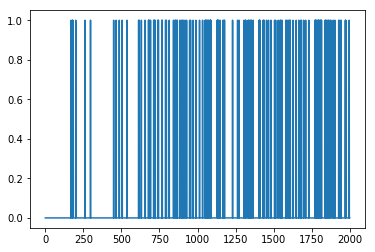

In [59]:
plt.plot(rList)

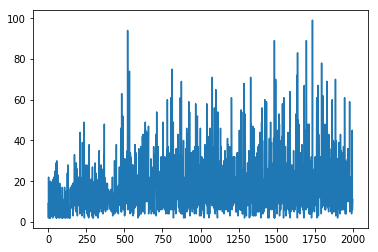

In [60]:
plt.plot(jList)

In [61]:
time x = range(10000)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 63.2 µs
